In [191]:
#Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns

In [192]:
#Read in the data 

df = pd.read_csv('/Users/bradsilk/Desktop/courses/PythonForML+DS/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/movies.csv',encoding='latin-1')

---

In [193]:
#Look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [195]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [196]:
#Order data by gross revenue

df = df.sort_values(by='gross',ascending=False)

---

In [197]:
#Look for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


---

In [198]:
#Data cleaning:

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [199]:
#Change inapropriate float-type columns to int-type (budget, gross)

df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [200]:
#'year' and the year value from 'released' do not always match...
#Create new 'year_correct' column so that matches year value from 'released'

df['released'] = pd.to_datetime(df['released'],format='%Y-%m-%d')
df['year_correct'] = df['released'].dt.year

In [201]:
#Drop duplicates

df = df.drop_duplicates()

---

In [202]:
#Correlation and regression analysis:

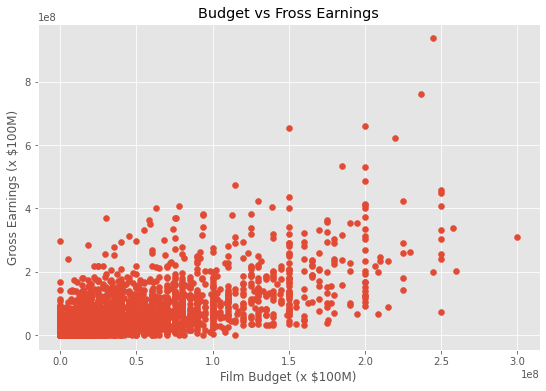

In [203]:
#Scatter plot (budget vs gross)

plt.figure(figsize=(9,6))

plt.scatter(data=df,x='budget',y='gross');

plt.title('Budget vs Fross Earnings');

plt.xlabel('Film Budget (x $100M)');
plt.ylabel('Gross Earnings (x $100M)');



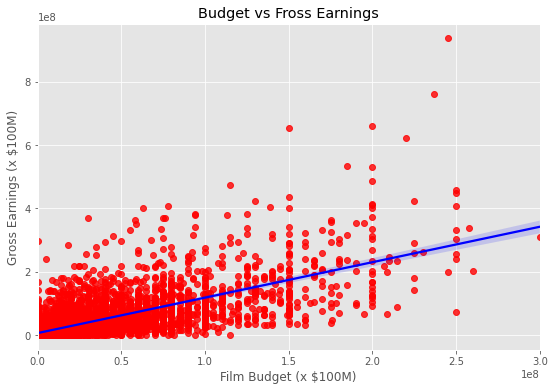

In [204]:
#Reg plot (budget vs gross)

plt.figure(figsize=(9,6))
sns.regplot(data=df,x='budget',y='gross',scatter_kws={'color':'red'},line_kws={'color':'blue'},);

plt.title('Budget vs Fross Earnings');

plt.xlabel('Film Budget (x $100M)');
plt.ylabel('Gross Earnings (x $100M)');

In [205]:
#Looking at various correlations

df.corr()

,budget,gross,runtime,score,votes,year,year_correct
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
year_correct,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


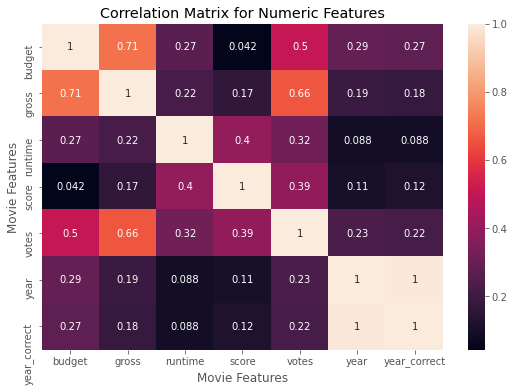

In [206]:
#Visualizing correlation

plt.figure(figsize=(9,6))

corr_matrix = df.corr()

sns.heatmap(data=corr_matrix,annot=True);

plt.title('Correlation Matrix for Numeric Features');

plt.xlabel('Movie Features');
plt.ylabel('Movie Features');

In [207]:
#Looking at the relationship between company (categorical) and gross
    #1.)Assigning codes to categorical data

df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype=='object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

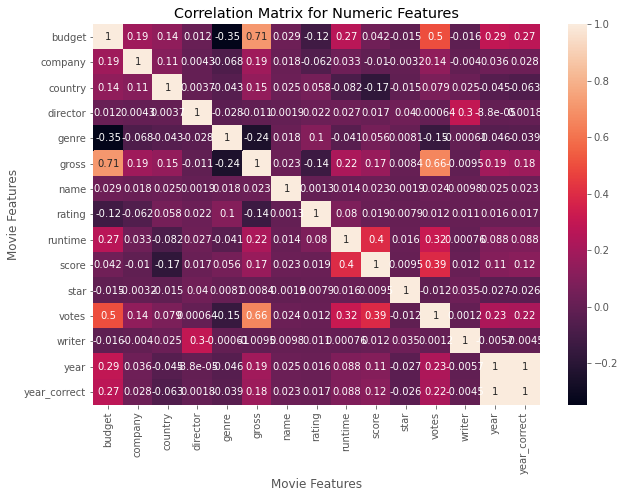

In [217]:
#Looking at the relationship between company (categorical) and gross
    #2.)Creating heatmap
    
    #Visualizing correlation

plt.figure(figsize=(10,7))

sns.heatmap(data=df_num.corr(),annot=True);

plt.title('Correlation Matrix for Numeric Features');

plt.xlabel('Movie Features');
plt.ylabel('Movie Features');

In [238]:
#Filtered correlations:

corr_matrix = df_num.corr()
corr_pairs = corr_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr[(high_corr) != 1].sort_values(ascending=False)

#Votes and budget have the highest correlatons to gross earnings; company has a low correlation

year          year_correct    0.996229
year_correct  year            0.996229
gross         budget          0.712196
budget        gross           0.712196
votes         gross           0.662457
gross         votes           0.662457
budget        votes           0.503924
votes         budget          0.503924
dtype: float64